In [1]:
import  cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
#from PIL import Image

In [2]:
# Reading the training data of csv type :
df = pd.read_csv('E:/data/Facial key2/training/training.csv')
print('Shape of the data :',df.shape)
print("Information about data :",df.info())

Shape of the data : (7049, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inne

In [3]:
print(" NULL Values status of datasets :\n",df.isnull().any().value_counts)
print('*'*100)
print('Shape before Dropping Nan Values :',df.shape)
print("-"*100)
# dropping all Nan values from datasets:
df = df.dropna()

print("After deropping all nan values from datasets :\n")
print("Shape : ",df.shape)
print('*'*100)
print(df.isnull().any().value_counts)

 NULL Values status of datasets :
 <bound method IndexOpsMixin.value_counts of left_eye_center_x             True
left_eye_center_y             True
right_eye_center_x            True
right_eye_center_y            True
left_eye_inner_corner_x       True
left_eye_inner_corner_y       True
left_eye_outer_corner_x       True
left_eye_outer_corner_y       True
right_eye_inner_corner_x      True
right_eye_inner_corner_y      True
right_eye_outer_corner_x      True
right_eye_outer_corner_y      True
left_eyebrow_inner_end_x      True
left_eyebrow_inner_end_y      True
left_eyebrow_outer_end_x      True
left_eyebrow_outer_end_y      True
right_eyebrow_inner_end_x     True
right_eyebrow_inner_end_y     True
right_eyebrow_outer_end_x     True
right_eyebrow_outer_end_y     True
nose_tip_x                   False
nose_tip_y                   False
mouth_left_corner_x           True
mouth_left_corner_y           True
mouth_right_corner_x          True
mouth_right_corner_y          True
mouth_cente

### Data Augmentation
Since the data we have is comparable very small for this task , Let's create some more data by Augmentaion.
This is not only the reason, Data augmentation helps to understand model if data is slightly flipped , rotated,and things like that.

In [4]:
# Extracting training image from the datasets:
def get_image(datasets):
    train_images = []
    for img in datasets['Image']: # Looping in image column of datasets 
        img = np.array(img.split(' ')).astype(int) # split by space and convert into numpy array of int type
        img = np.reshape(img,(96,96)) # Reshape Image 
        img = img/255 # Normalize Image
        train_images.append(img)
    return train_images
# code credit 
# Image Augmenation 
# https://github.com/agrawal-rohit/Snapchat-filter-system/blob/master/read_data.py
def augment(img, points):
    f_img = img[:, ::-1]        # Mirror the image
    for i in range(0,len(points),2):        # Mirror the key point coordinates
        x_renorm = (points[i]+0.5)*96       # Denormalize x-coordinate
        dx = x_renorm - 48          # Get distance to midpoint
        x_renorm_flipped = x_renorm - 2*dx      
        points[i] = x_renorm_flipped/96 - 0.5       # Normalize x-coordinate
    return f_img, points


In [5]:
x_images = get_image(df) 

In [6]:
y_label = df.iloc[:,:30]

In [7]:
img_train = np.array(x_images) # Converting into numpy array
y_train = np.array(y_label) # Converting into numpy array

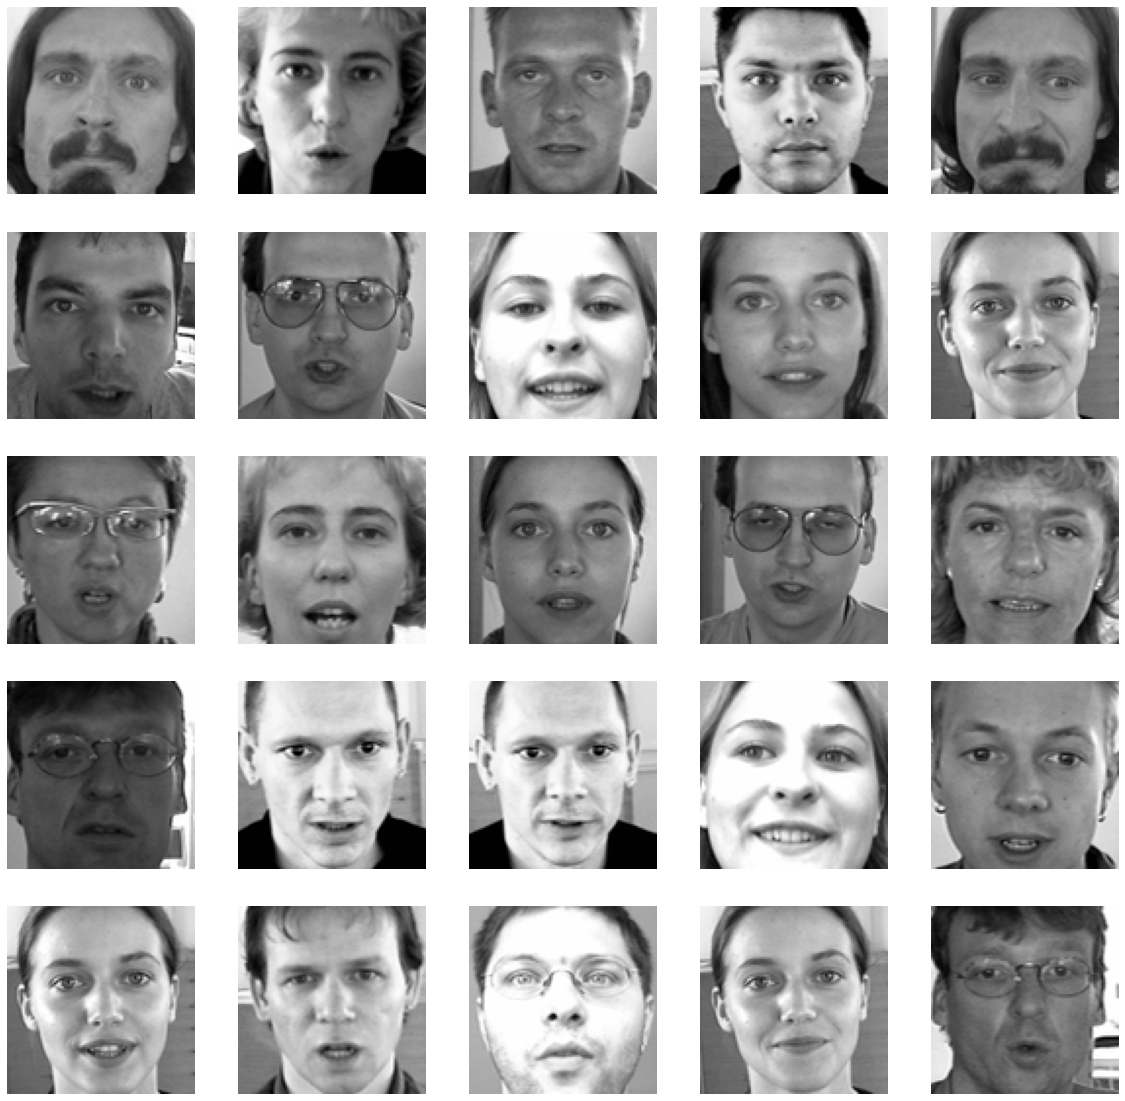

In [8]:
# Take a Look at training Images Without Facial point
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(img_train[i],cmap='gray')
    plt.axis('off')

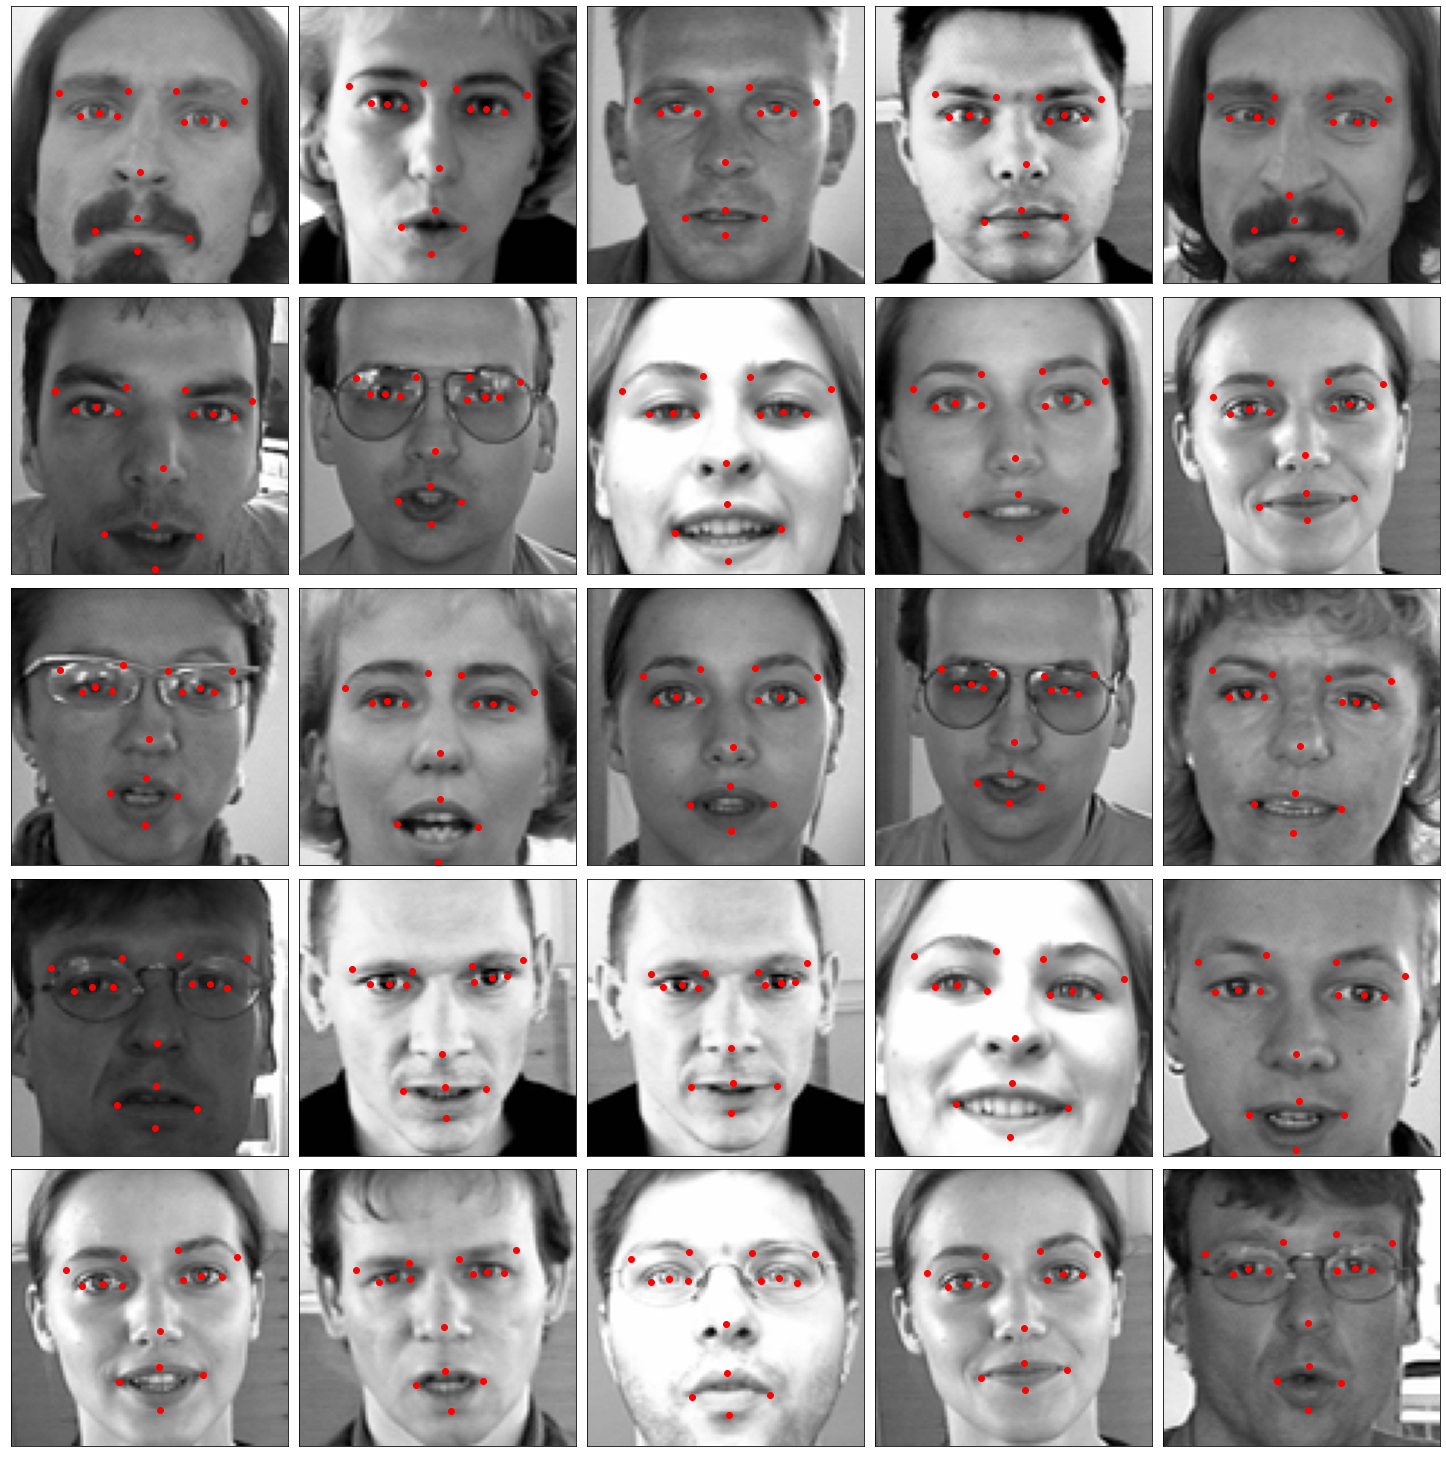

In [9]:
# Take a looks at training image with facial key points :
def get_image_and_dots(df, index): # function to plot image with facial key points
    image = plt.imshow(img_train[index],cmap='gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(y_train[index][i-1], y_train[index][i], 'ro'))
        
    return image, l
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.0)

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    get_image_and_dots(img_train, i)

plt.show()

### Data Augmentation
Since the data we have is comparable very small for this task , Let's create some more data by Augmentaion.
This is not only the reason, Data augmentation helps to understand model if data is slightly flipped , rotated,and things like that.

In [10]:
aug_img = []
aug_y = []
for point_,image_ in enumerate(img_train): # looping in training image through enumerate
    img , pts = augment(image_,y_train[point_]) # calculating augmented image and points
    aug_img.append(img) #appending img in a list
    aug_y.append(pts) #appending pts in a list
aug_img = np.array(aug_img) # converting aug_img in to numpy array
aug_y = np.array(aug_y)   # Converting aug_y in numpy array
# Concatenate augmenated image and points with training image and pts 
prefinal_x = np.concatenate((img_train,aug_img),axis=0)
prefinal_y = np.concatenate((y_train,aug_y),axis=0)

In [11]:
print("shape after augmented :",prefinal_x.shape)

shape after augmented : (4280, 96, 96)


In [12]:
final_x = np.reshape(prefinal_x,(prefinal_x.shape[0],prefinal_x.shape[1],prefinal_x.shape[2],1))
final_y = prefinal_y
print("shape of input :",final_x.shape)

shape of input : (4280, 96, 96, 1)


In [13]:
# All import 
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,MaxPooling2D,Conv2D,BatchNormalization,Dropout,Flatten
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import LeakyReLU

In [14]:
# Model Architectures
inputs = Input(shape=(96,96,1))
conv1 = Conv2D(filters=64,kernel_size=3,strides=2,padding='same',use_bias=False)(inputs)
conv1 = LeakyReLU(alpha=0.1)(conv1)
conv1 = BatchNormalization()(conv1)
maxpool1 = MaxPooling2D(pool_size=(2,2),padding='same')(conv1)
conv2 = Conv2D(filters=128,kernel_size=3,strides=2,padding='same',use_bias=False)(maxpool1)
conv2 = LeakyReLU(alpha=0.1)(conv2)
conv2 = BatchNormalization()(conv2)
maxpool2 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2)
conv3 = Conv2D(filters=128,kernel_size=3,strides=2,padding='same',use_bias=False)(maxpool2)
conv3 = LeakyReLU(alpha=0.1)(conv3)
conv3 = BatchNormalization()(conv3)
maxpool3 = MaxPooling2D(pool_size=(2,2),padding='same')(conv3)
conv4 = Conv2D(filters=64,kernel_size=3,strides=2,padding='same',use_bias=False)(maxpool3)
conv4 = LeakyReLU(alpha=0.1)(conv4)
conv4 = BatchNormalization()(conv4)
maxpool4 = MaxPooling2D(pool_size=(2,2),padding='same')(conv4)
flatten = Flatten()(maxpool4)
dense1 = Dense(128)(flatten)
dense1 = LeakyReLU(alpha=0.2)(dense1)
dense1 = BatchNormalization()(dense1)
dropout1 = Dropout(0.1)(dense1)
dense2 = Dense(256)(dropout1)
dense2 = LeakyReLU(alpha=0.1)(dense2)
dense2 = BatchNormalization()(dense2)
dropout2 = Dropout(0.2)(dense2)
dense3 = Dense(128)(dropout2)
dense3 = LeakyReLU(alpha=0.1)(dense3)
dense3 = BatchNormalization()(dense3)
dropout3 = Dropout(0.1)(dense3)
dense4 = Dense(30)(dropout3)
model = Model(inputs=inputs,outputs=dense4)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 64)        576       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       73728     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 12, 12, 128)       0     

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.fit(x=final_x,y=final_y,epochs=80,batch_size=32)

In [15]:
model.save('facial_model.h5')

In [15]:
m = load_model('facial_model.h5')

In [16]:
# Getting the test Data :
test_df = pd.read_csv("E:/data/Facial key2/test/test.csv")
test_df = get_image(test_df)

In [17]:
x_test = np.array(test_df)

In [18]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

In [19]:
pred = m.predict(x_test)

## Test the Results that we got 

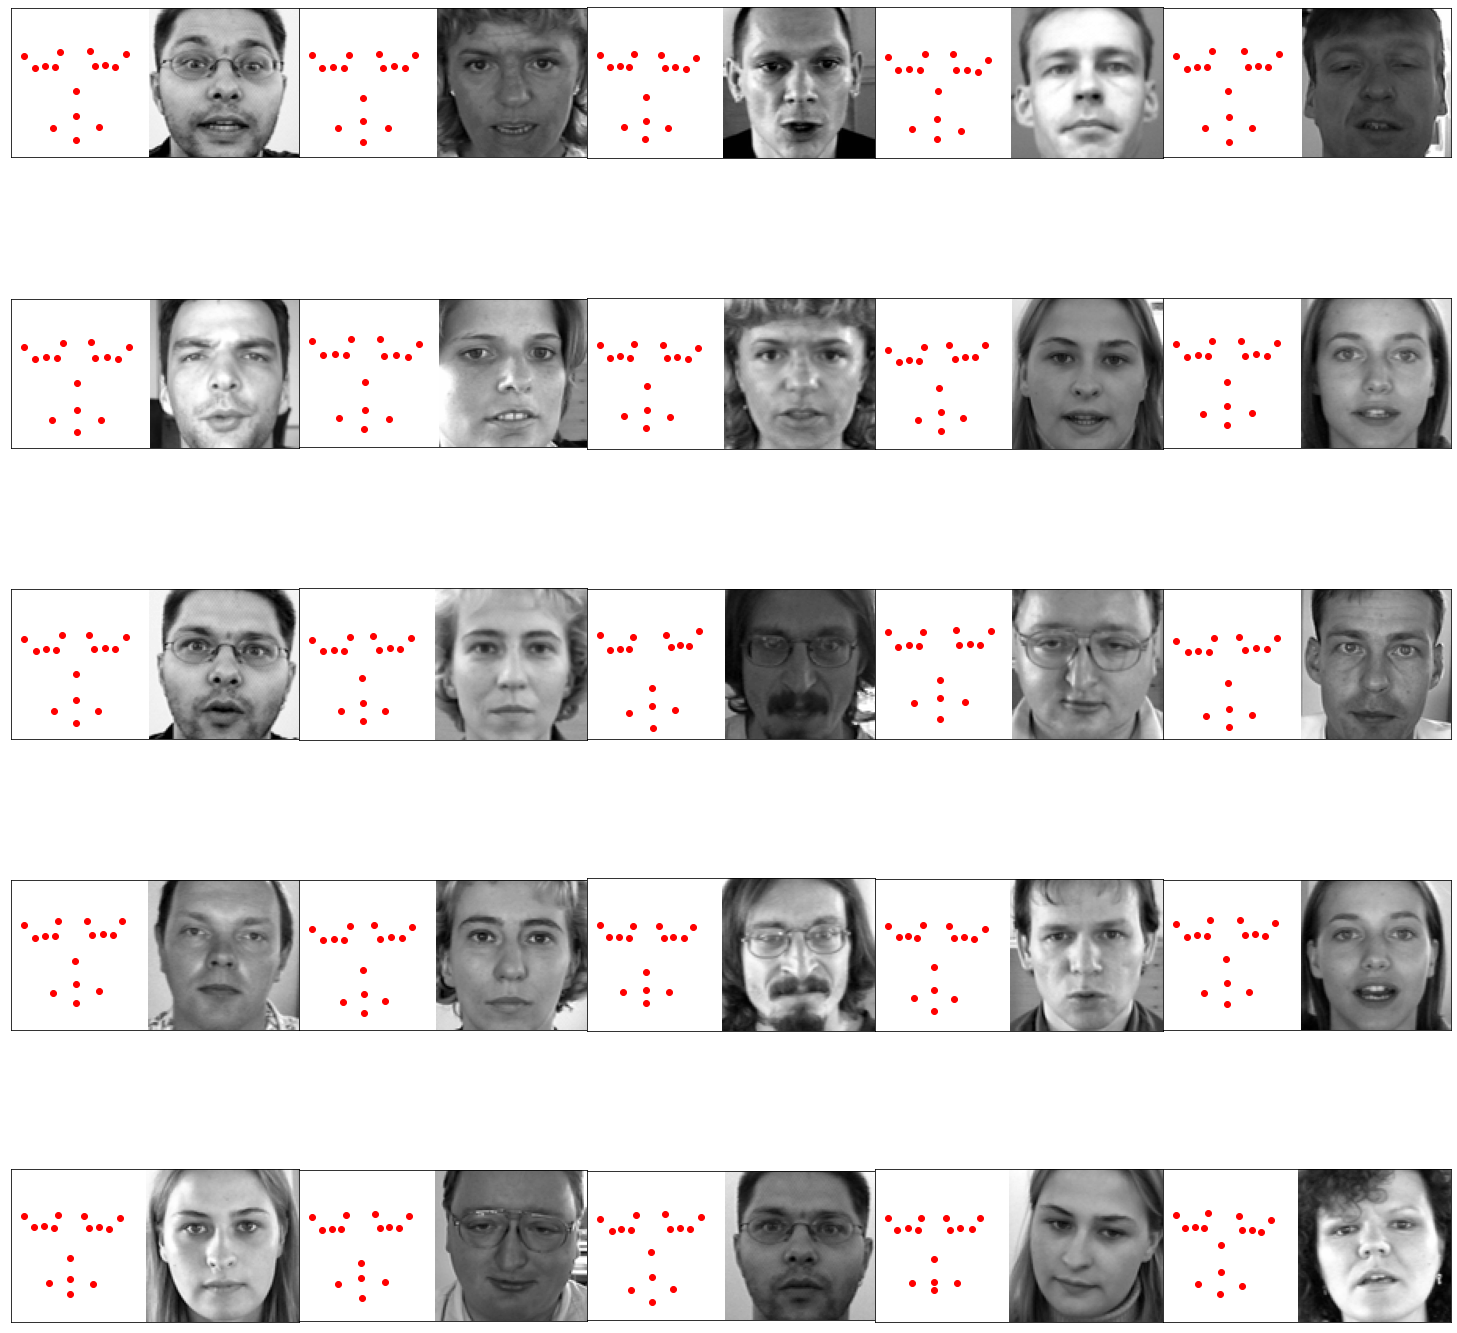

In [20]:
# Take a looks at training image with facial key points :
def get_image_and_dots(df, index): # function to plot image with facial key points
    image = plt.imshow(df[index],cmap='gray')
    l = []
    for i in range(1,31,2):
        l.append(plt.plot(pred[index][i-1], pred[index][i], 'ro'))
        
    return image, l
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.0)

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    get_image_and_dots(test_df, i)

plt.show()

As you can see here the result of the model is not so bad because , The amount of data is comparably small for the our task.
We can easily perform better if we have reasonable amount of data with some Hyper-Parameter Tunning .

In [21]:
face_cascade = cv2.CascadeClassifier('C:/Users/Lenovo/Desktop/Facekey/haarcascade_frontalface_default.xml')

In [26]:
capture = cv2.VideoCapture(0)
while 1 :
    rate,frame = capture.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces :
    
    # Getting interest images
        gray_region_of_interest = gray[y:y+h,x:x+w] # cropped gray image
        color_region_of_interest = frame[y:y+h,x:x+w] # cropped color Image
        copy_1 = np.copy(frame) # Copying the image for further use
        copy_2 = np.copy(frame) # Copying the image for further use
        # preparing the input images for model
        original_height = gray_region_of_interest.shape[0] #height of gray_region_of_interest images
        original_width = gray_region_of_interest.shape[1] # width of gray_region_of_interest image
        resize_gray_img = cv2.resize(gray_region_of_interest,(96,96)) # resizing the images
        resize_color_img = cv2.resize(color_region_of_interest,(96,96)) 
        normalize_gray_img = resize_gray_img/255 # Normalize the images
        reshape_gray_img = np.reshape(normalize_gray_img,(1,96,96,1)) # reshape the input for models
        # Getting the keypoints from the models
        face_keypoints = m.predict(reshape_gray_img)[0]
        # Keypoints have 30 points which are as follows
        # [x1,y1,x2,y2.......x15,y15] 
        X_cordinates = face_keypoints[0::2] # Getting all x-cord of face key points
        Y_cordinates = face_keypoints[1::2] # Getting all y-cord of face key point
        X_cordinates_1 = np.array(X_cordinates,dtype='int8')
        Y_cordinates_1 = np.array(Y_cordinates,dtype='int8')
        cx = np.absolute(X_cordinates_1)
        cy = np.absolute(Y_cordinates_1)
        
        # Denormalizing the cordinates :
        Denormalize_x = (X_cordinates+0.5)*original_width
        Denormalize_y= (Y_cordinates+0.5)*original_height
        Dx = np.array(Denormalize_x,dtype='int8')
        Dy = np.array(Denormalize_y,dtype='int8')
        Dx1 = np.absolute(Dx)
        Dy1 = np.absolute(Dy)
        for i in range(len(X_cordinates)):
            r = cv2.circle(resize_color_img,(cx[i],cy[i]),3,(9, 78, 237),-1)
        cv2.imshow('image',r)
        cv2.imshow('image2',copy_1)
        
        
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
capture.release()
cv2.destroyAllWindows() 